In [4]:
import pandas as pd
import seaborn as sns
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.patches as mpatches

# rc('font',**{'family':'serif','serif':['Palatino']})
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

In [5]:
data_df = pd.read_csv('/Users/m221138/RA_plasma_metabolites/data/67_met_every_confounds_v2.csv', index_col=0)
data_df = data_df.T
data_df.head()

,patient_dummyID,SEX,AGE,mtx,csdmard,tnfi,ntnfi,pred,smoke,crp,...,100002911,1489,100020361,100001104,100000269,100020866,100001510,100001767,171,344
ST-00010415_t1,0.0,1.0,75.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.6174,5.8065,1.5960,2.3718,0.7689,4.2787,2.8148,1.5577,0.0243,1.3874
ST-00010415_t2,0.0,1.0,76.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.9193,0.5310,1.1545,1.4633,0.9511,4.7451,2.6375,0.8981,0.2159,1.3073
ST-00010421_t1,1.0,1.0,70.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.3136,7.5976,1.3427,1.1518,1.3642,1.7638,0.7221,3.1478,0.1789,1.3242
ST-00010421_t2,1.0,1.0,71.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3.3806,0.4750,0.9460,0.8480,0.7717,1.4401,1.4132,0.5696,0.4390,1.1715
ST-00011458_t1,2.0,0.0,69.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.3923,2.7211,1.1114,0.8064,2.3825,0.9498,0.9553,1.2109,0.1584,1.0916


In [13]:
# met_list = ["503","803","1087","1442","100001197","100001577","100002945","100015831"]
met_list = ["803","503","1442","100002945","100015831","1087","100001197","100001577"]

met_name_list = ["mannose","serine","beta-hydroxyisovalerate",
                 "(14 or 15)-methylpalmitate (a17:0 or i17:0)",
                 "linolenoylcarnitine (C18:3)","erucate (22:1n9)",
                 "10-undecenoate (11:1n1)","N-acetylcitrulline"]


# pvalue_list = ["7.85E-04","3.49E-05","2.66E-02",
#                "4.67E-03","2.67E-02","2.89E-02","8.29E-03","2.65E-02"]

pvalue_list = ["3.49E-05","7.85E-04","4.67E-03","8.29E-03","2.65E-02",
               "2.66E-02","2.67E-02","2.89E-02"]

In [11]:
def calcaulte_mean(data_df,chemID):
    higher_list = []
    lower_list = []
    chem_value_list = data_df[chemID]
    crp_list = data_df["crp"]
    
    for i in range(len(chem_value_list)):
#         print (crp_list[i])
        if crp_list[i] == 0:
            lower_list.append(float(chem_value_list[i]))
        if crp_list[i] == 1:
            higher_list.append(float(chem_value_list[i]))
  
    lower_mean = statistics.mean(lower_list)
    higher_mean = statistics.mean(higher_list)
    print (lower_mean, higher_mean)
    return lower_mean, higher_mean

0.9773355263157895 1.2893
1.0610526315789475 0.9214057692307692
0.9641144736842105 1.1472884615384615
1.0091736842105263 1.4941557692307692
1.1645302631578947 0.9923326923076923
0.9888131578947368 1.2129
1.0178736842105263 1.2408673076923078
1.1289276315789474 1.2773134615384616


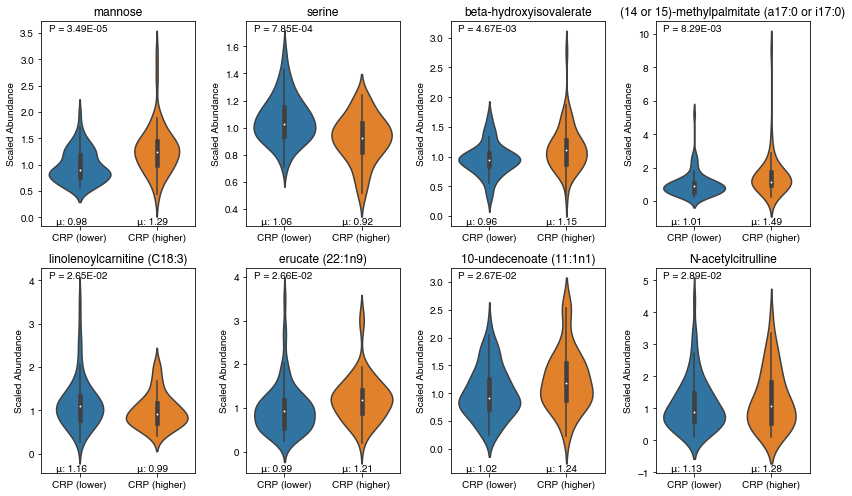

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(12,7))
axes_list = [item for sublist in axes for item in sublist] 
output_pdf = '/Users/m221138/RA_plasma_metabolites/data/binary_crp/overall_violin.pdf'

for i in range(len(met_list)):
    ax = axes_list.pop(0)
    chemID = met_list[i]
    chem_name = met_name_list[i]
    pvalue = pvalue_list[i]
    
    lower_mean, higher_mean = calcaulte_mean(data_df,chemID)
    lower_mean = '\u03BC: %s' % round(lower_mean,2)
    higher_mean = '\u03BC: %s' % round(higher_mean,2)
    sns.violinplot(x="crp", y=chemID, ax=ax, data=data_df)
    labels = [item.get_text() for item in ax.get_xticklabels()]

    labels[1] = 'CRP (higher)'
    labels[0] = 'CRP (lower)'
    ax.set_xticklabels(labels)
    ax.text(0.10, 0.01, lower_mean, transform=ax.transAxes)
    ax.text(0.62, 0.01, higher_mean, transform=ax.transAxes)
    ax.text(0.05, 0.95, "P = %s" % pvalue, transform=ax.transAxes)
    ax.set(ylabel="Scaled Abundance", xlabel="")
    ax.set_title("%s" % chem_name)
    
fig.tight_layout()

fig.get_figure()
fig.savefig(output_pdf)  